In [95]:
# Assignment 4
# Name : Adarsh Pathak
# NUID : 002830444

This assignment encompassed the analysis of three predictive models—linear regression, random forest, and an AutoML stacked ensemble—applied to the prediction of flight delays. The linear regression model elucidated feature coefficients, while the tree-based model provided insights into decision nodes and feature importance. AutoML, employing a diverse ensemble, showcased a unified approach. SHAP analysis was then employed to interpret and compare the models, revealing variations in feature importance. Notably, time emerged as pivotal in linear regression and random forest, while AutoML emphasized the significance of airline and time. This exercise highlighted the nuanced perspectives each model brings to predicting flight delays, emphasizing the importance of interpretability in understanding their decision-making processes.

#About the Dataset

**Columns**

**PassengerId**: Passenget Id is their identity

**Survived**: Survived or not

**Pclass**: Passenger class

**SibSp**: Sibling spouse

**Parch**: Parent child

**Fare**: Price of ticket

**Age_mean**: Age of passenger

**Embarked_Column_Q**: City name

**Embarked_Column_S**: City name

**Sex_M**: Sex of passenger

#Installations

In [96]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [97]:
!pip install xgboost

In [98]:
!pip install shap

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import shap

# 1. Data Cleaning and Feature Selection

In [100]:
# Loading the dataset from the github repository

url = 'https://raw.githubusercontent.com/adpathak07/DataScienceAssignment1/main/Titanic-Dataset.csv'

df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# Dropping the id column

df = df.drop(['PassengerId'], axis = 1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preprocessing and Analysis

In [102]:
df.shape

(891, 11)

In [103]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


It can be seen that we have three data types in our dataset:

int64: These columns contain whole numbers (integers).

object: These columns contain text or mixed data types.

float64: These columns contain decimal values.

From the above output, we can see that there are 5 numerical and 3 categorical variables

# Are there missing values?

In [104]:
df.isnull().sum() # Checking for any null values in the dataset

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As seen above, we have some null values

So I will fill numerical values with mean and fill categorical columns with mode.


In [105]:
# filling age (numerical column) with mean

mean_age = df['Age'].mean()
df['Age_mean'] = df['Age'].fillna(mean_age)

In [106]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [107]:
# dropping Age because new Age_mean is added

df = df.drop(['Age'], axis=1)
df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [108]:
# Counting which value counts are highest

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
# Counting value counts for Sex column

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [110]:
# Counting value counts for Sex column

df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [111]:
# dropping unecessary columns

cols_to_drop = ['Name', 'Ticket', 'Cabin']

df.drop(columns = cols_to_drop, axis=1, inplace=True)

In [112]:
# Filling missing of Embarked

mode_value = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_value, inplace=True)

In [113]:
# filled all missing values

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age_mean    0
dtype: int64

In [114]:
# applying oneHotEncoder

ohe = OneHotEncoder(drop='first', sparse = False, dtype=np.int32)
cols_to_ohe = df[['Embarked']]
encoded_data = ohe.fit_transform(cols_to_ohe)

#creating data frame for encoded data
df_encoded = pd.DataFrame(encoded_data, columns=["Embarked_Column_Q", "Embarked_Column_S"])

#join the encoded column to main dataframe
df = pd.concat([df, df_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [115]:
# checking if Sex is encoded
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_mean,Embarked_Column_Q,Embarked_Column_S
0,0,3,male,1,0,7.2500,S,22.0,0,1
1,1,1,female,1,0,71.2833,C,38.0,0,0
2,1,3,female,0,0,7.9250,S,26.0,0,1
3,1,1,female,1,0,53.1000,S,35.0,0,1
4,0,3,male,0,0,8.0500,S,35.0,0,1


In [116]:
# dropping as new Embarked is added
df.drop(['Embarked'], axis=1, inplace=True)

In [117]:
# applying oneHotEncoder to sex column

ohe = OneHotEncoder(drop='first', sparse = False, dtype=np.int32)
cols_to_ohe = df[['Sex']]
encoded_data = ohe.fit_transform(cols_to_ohe)

#creating data frame for encoded data
df_encoded = pd.DataFrame(encoded_data, columns=["Sex_M"])

#join the encoded column to main dataframe
df = pd.concat([df, df_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
# checking if columns added after OneHotEncoding
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_mean,Embarked_Column_Q,Embarked_Column_S,Sex_M
0,0,3,male,1,0,7.2500,22.0,0,1,1
1,1,1,female,1,0,71.2833,38.0,0,0,0
2,1,3,female,0,0,7.9250,26.0,0,1,0
3,1,1,female,1,0,53.1000,35.0,0,1,0
4,0,3,male,0,0,8.0500,35.0,0,1,1


In [119]:
# Remove Sex as new column is added

df.drop(['Sex'], axis=1, inplace=True)

In [120]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_mean,Embarked_Column_Q,Embarked_Column_S,Sex_M
0,0,3,1,0,7.2500,22.0,0,1,1
1,1,1,1,0,71.2833,38.0,0,0,0
2,1,3,0,0,7.9250,26.0,0,1,0
3,1,1,1,0,53.1000,35.0,0,1,0
4,0,3,0,0,8.0500,35.0,0,1,1


I have encoded the categorical variables into numerical values because many machine learning algorithms require numeric input. These algorithms work with numbers, and they can't directly process text or categorical data.

By converting Sex and Embarked names into numerical codes, we make it possible for machine learning models to use this information effectively when predicting Survived status. Essentially, this encoding step allows our model to understand and work with the airline and airport data, which are important features in predicting flight delays.

In [121]:
# Splitting our dataset into two dataframes - 1. Predictor Variables 2. Target Variable
y = df['Survived']
x = df.drop('Survived', axis = 1)
df_total = df

# What are the likely distributions of the numeric variables?

<Figure size 800x500 with 0 Axes>

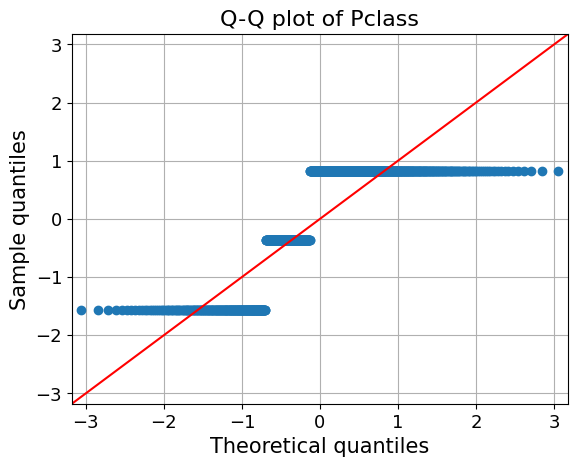

<Figure size 800x500 with 0 Axes>

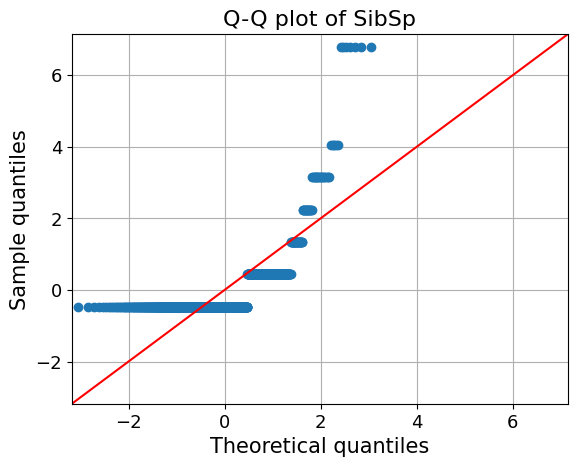

<Figure size 800x500 with 0 Axes>

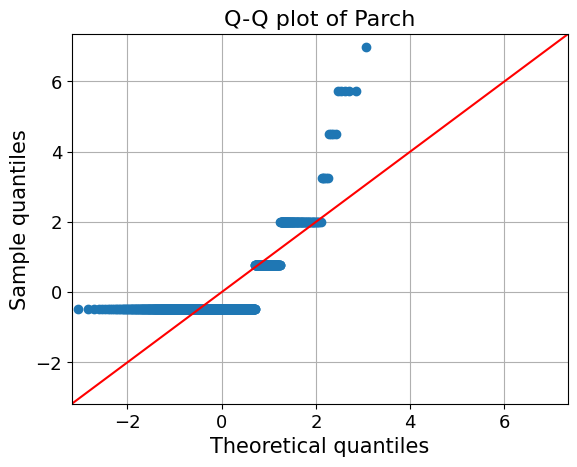

<Figure size 800x500 with 0 Axes>

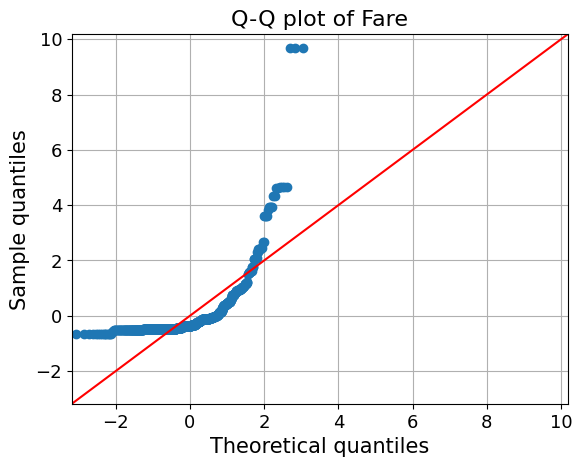

<Figure size 800x500 with 0 Axes>

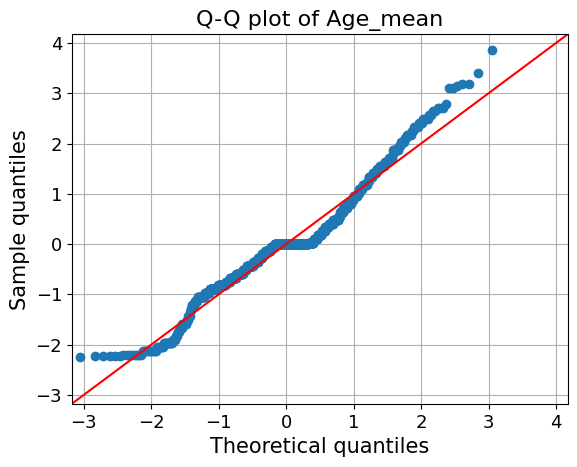

In [122]:
from re import X
#checking the distribution of numerical independent variables
from statsmodels.graphics.gofplots import qqplot
x_norm=x[['Pclass', 'SibSp',
       'Parch', 'Fare', 'Age_mean']]
for c in x_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(x_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Except for the independent variable, i.e., "Fare", the other five numerical indepent variables roughly follow the normal distribution with some outliers in the front and the end.

For each categorical independent variable, calculate the number of each category and have an overview of its distribution.

In [123]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_mean,Embarked_Column_Q,Embarked_Column_S,Sex_M
0,0,3,1,0,7.2500,22.0,0,1,1
1,1,1,1,0,71.2833,38.0,0,0,0
2,1,3,0,0,7.9250,26.0,0,1,0
3,1,1,1,0,53.1000,35.0,0,1,0
4,0,3,0,0,8.0500,35.0,0,1,1


1.

In [124]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age_mean,Embarked_Column_Q,Embarked_Column_S,Sex_M
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,29.699118,0.086420,0.725028,0.647587
std,0.486592,0.836071,1.102743,0.806057,49.693429,13.002015,0.281141,0.446751,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,29.699118,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000,1.000000,1.000000


This is a statistical summary of our DataFrame, and the output shows various statistics for each column in our dataset.

For example,

- The 25th percentile (Q1) for the Survived column is 0, meaning that 25% of the data has a delay value of 0.
- The maximum value in the Length column is 1, which is wheather the candidate is xurvived or not.

and so on.


This information is essential for understanding the characteristics of the dataset, including the central tendency (mean), spread (standard deviation), and the range of values. It's particularly useful for identifying outliers and gaining insights into the distribution of data, which can help in building and selecting appropriate machine learning models for predicting flight delays.

# Do the ranges of the predictor variables make sense?

<Axes: >

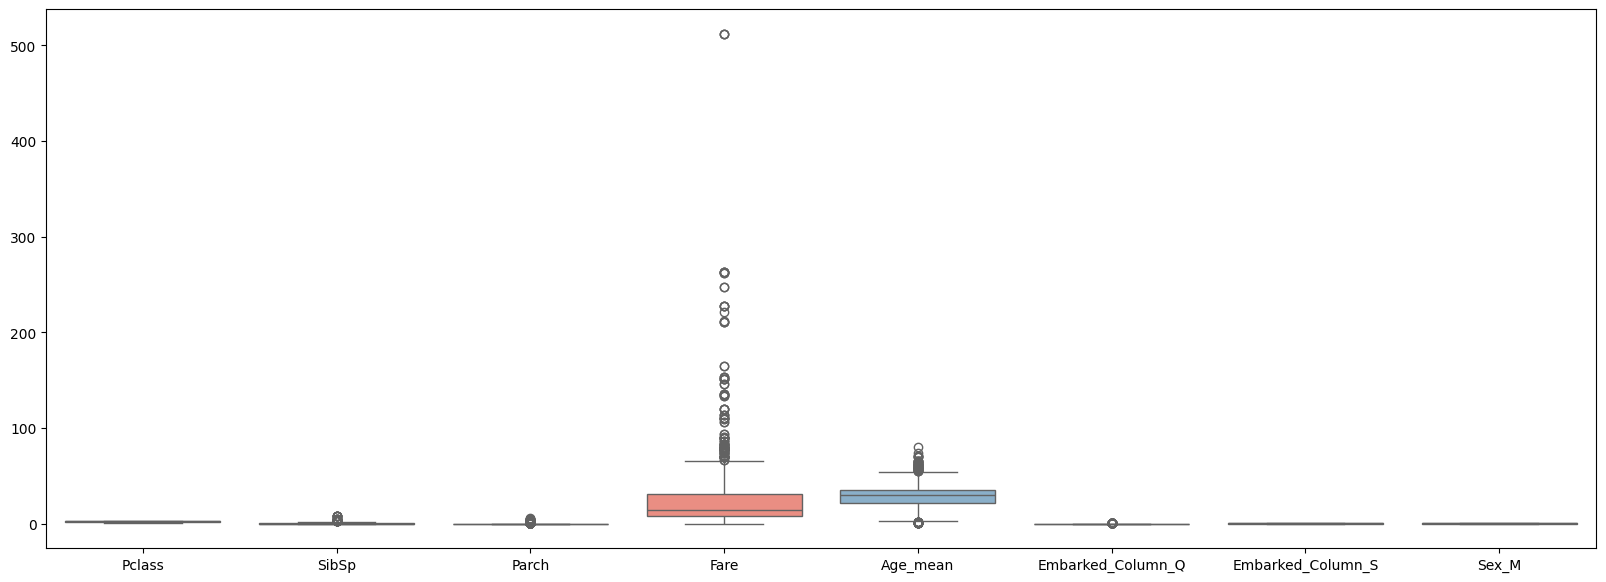

In [125]:
#Checking the range of the predictor variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")

*   The range of 'Fare' is way too high as compared to the other variables that is why we are not able to visualize the ranges for other predictor variables.
*  We will plot the charts separately to get the ranges of each one of them

<ipython-input-126-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x[cols[i]], palette = 'Set3')
<ipython-input-126-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x[cols[i]], palette = 'Set3')
<ipython-input-126-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x[cols[i]], palette = 'Set3')
<ipython-input-126-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

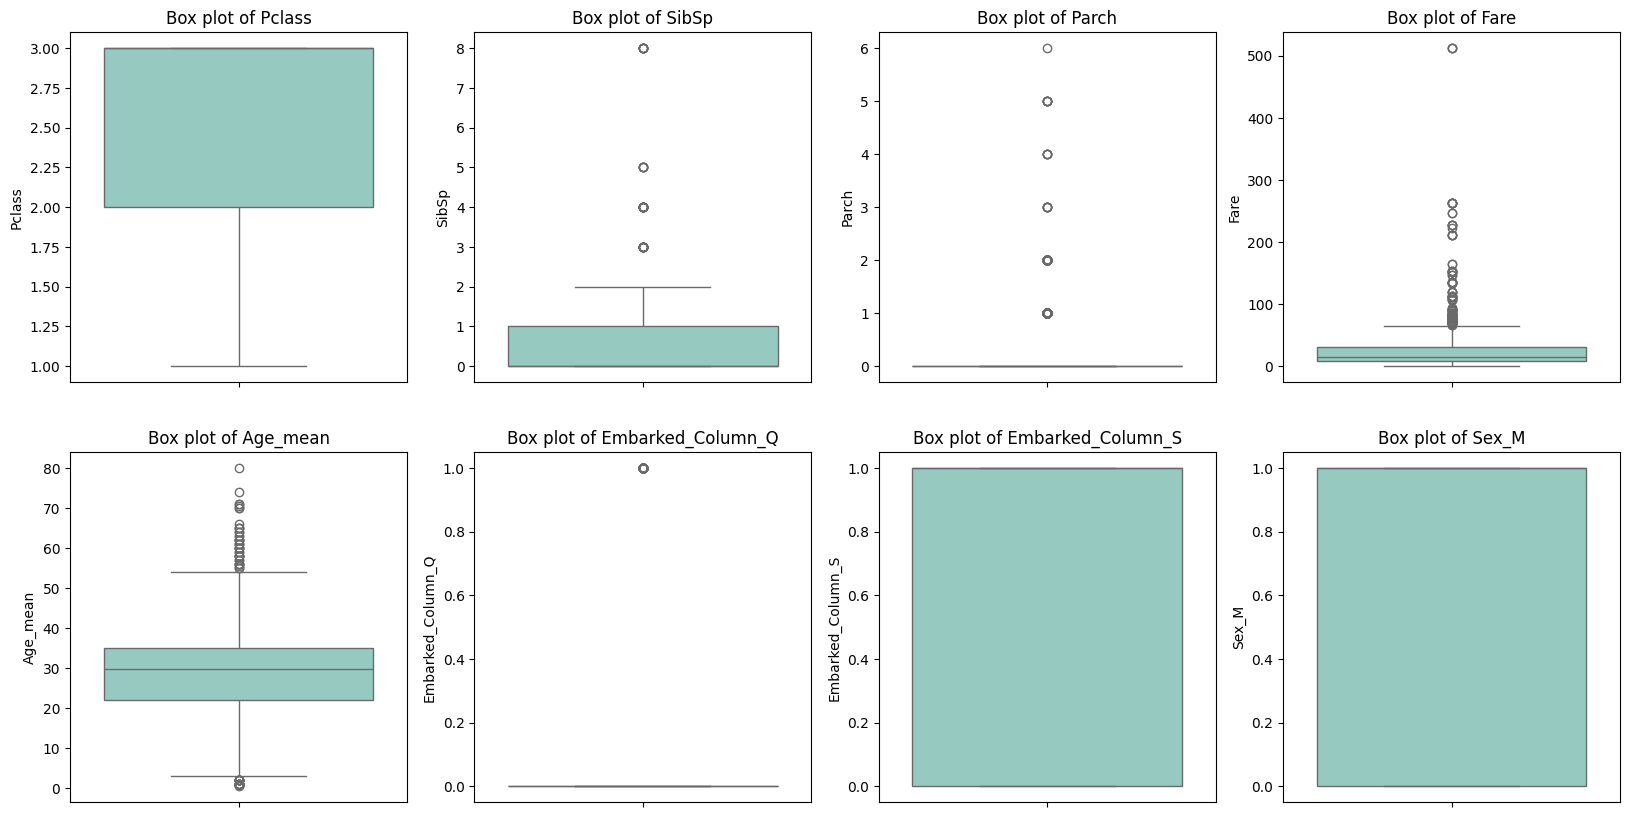

In [126]:
#Checking the Ranges of the predictor variables individually
cols = list(x.columns)
f, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(x[cols[i]], palette = 'Set3')
plt.show()

As we know already and we can see again, that there are outliers in 'Age_mean' and 'Fare'

**Normalizing the dataset**

In [127]:
# list of numerical columns which require normalization
num_cols= x.columns

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [128]:
# checking the predictor variables after normalization
x.describe()

,Pclass,SibSp,Parch,Fare,Age_mean,Embarked_Column_Q,Embarked_Column_S,Sex_M
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.065376,0.063599,0.062858,0.367921,0.086420,0.725028,0.647587
std,0.418036,0.137843,0.134343,0.096995,0.163383,0.281141,0.446751,0.477990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.015440,0.271174,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.028213,0.367921,0.000000,1.000000,1.000000
75%,1.000000,0.125000,0.000000,0.060508,0.434531,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the variables are now in the range of 0 to 1

Text(0.5, 1.0, 'Box plot of predictor variables of the dataset')

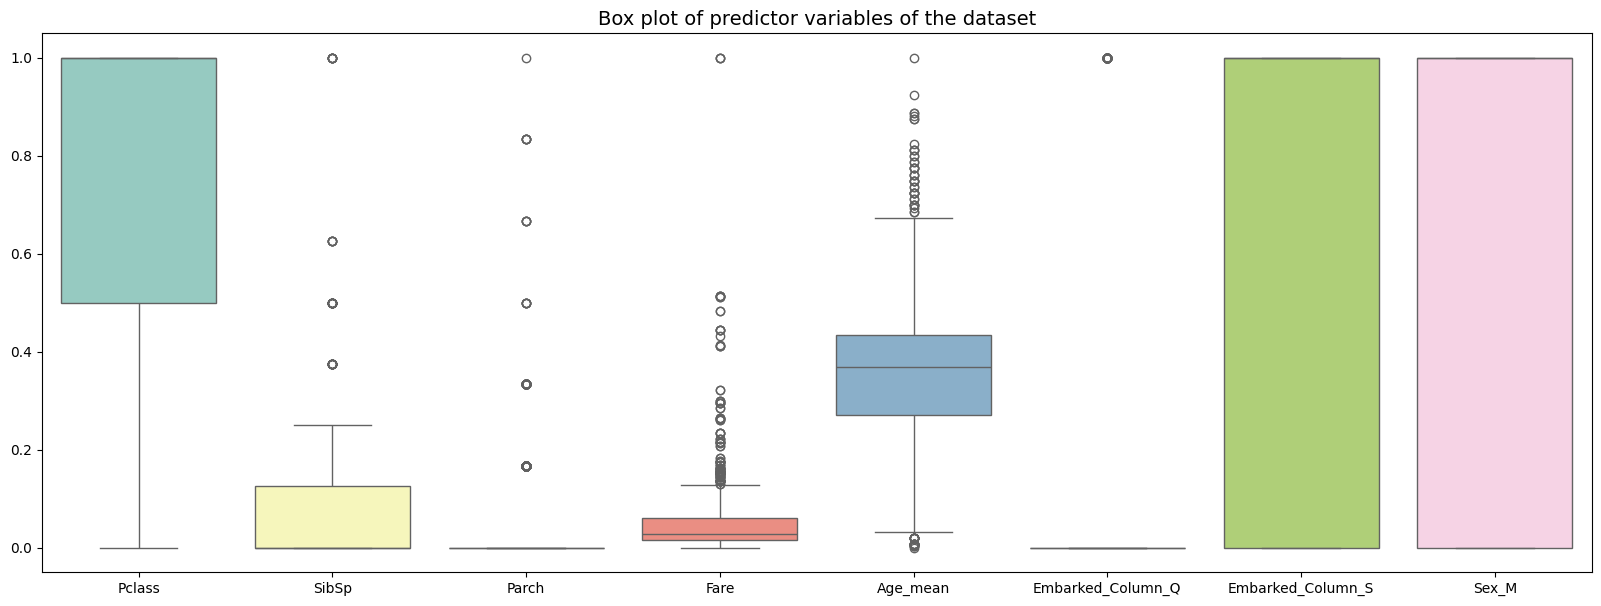

In [129]:
#Checking the Ranges of the predictor variables together after normalization
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")
plt.title("Box plot of predictor variables of the dataset", size=14)

# Are the predictor variables independent of all other predictor variables?

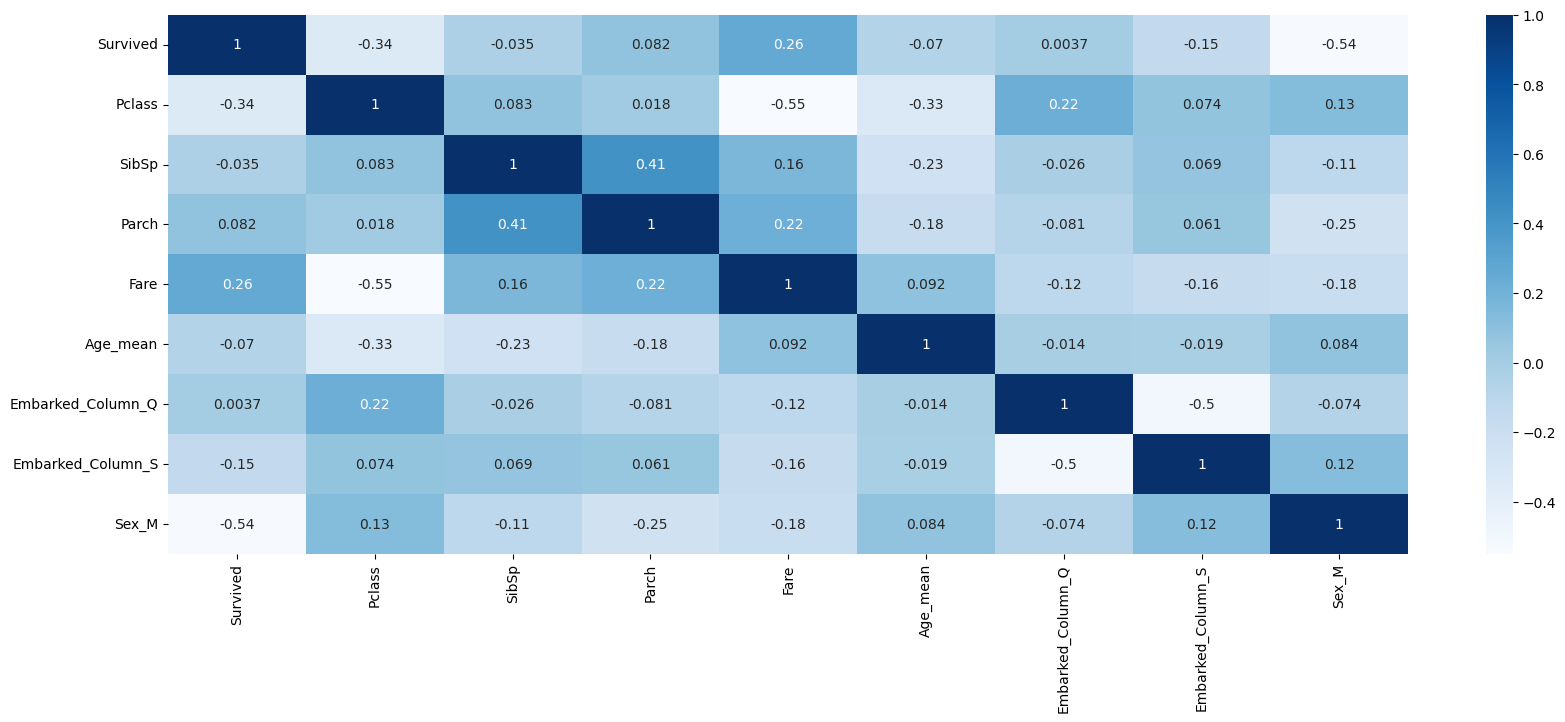

In [130]:
# Heatmap showing correlation between the attributes.

plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

#Correlation Analysis

The correlation heatmap provides a visual representation of the relationships between various features in the dataset. It is a matrix of colors that illustrates the strength of correlation between pairs of variables.

In the heatmap, each variable is represented on both the x and y axes, and the color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables. The color spectrum varies from lighter shades (e.g., light maroon) for low correlation to darker shades (e.g., dark maroon) for high correlation.

A correlation heatmap serves as a valuable tool for uncovering insights within the dataset. It assists in identifying patterns and trends, as well as pinpointing variables that exhibit strong correlations, whether positive or negative. This information is particularly useful for exploratory data analysis and can aid in the identification of potential predictor variables for statistical modeling.

Learnings from the above correlation map:

*   It is very clear from the heatmap that most of the variables are not dependent on each other
*   Degree of collinearity is significantly less that 0.1 for most variables


# Creating a Train - Test split for our model training and predictions

In [131]:
#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Do the training and test sets have the same data?

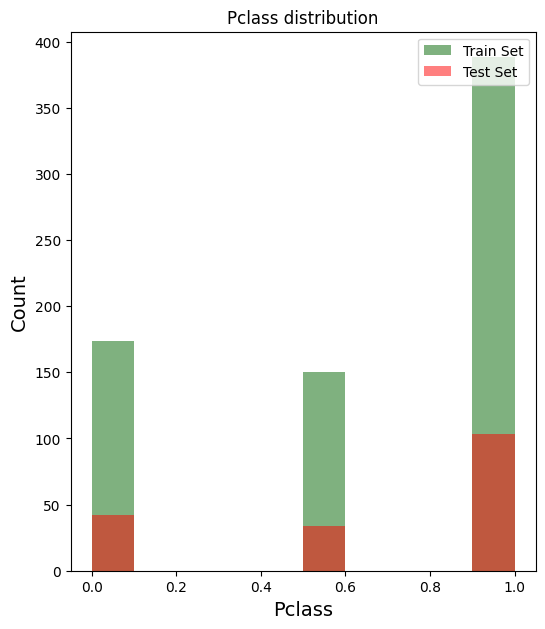

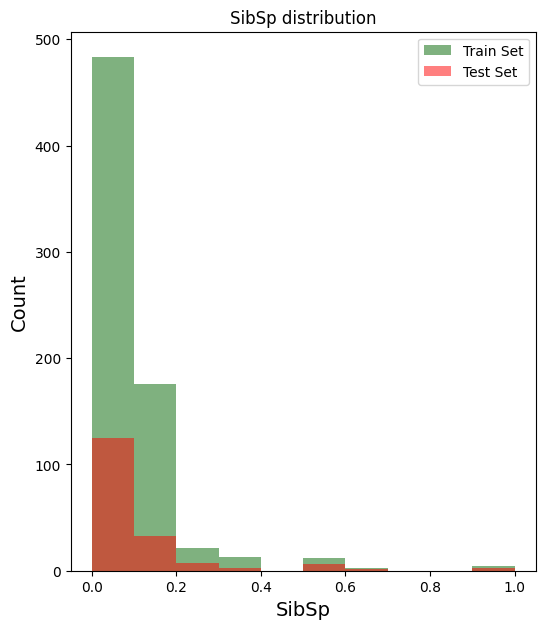

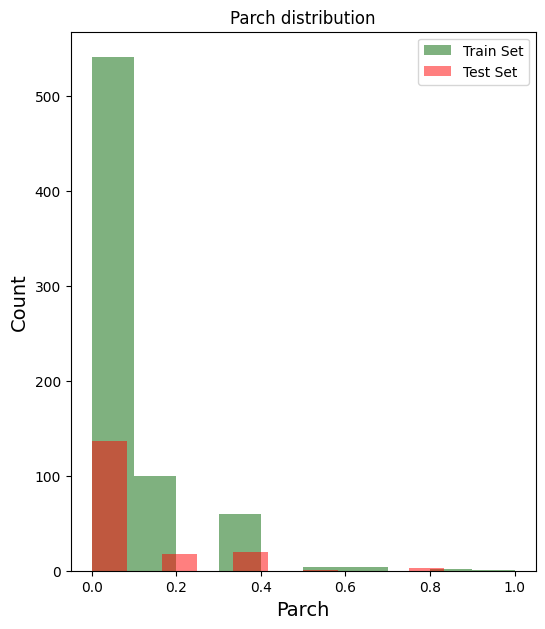

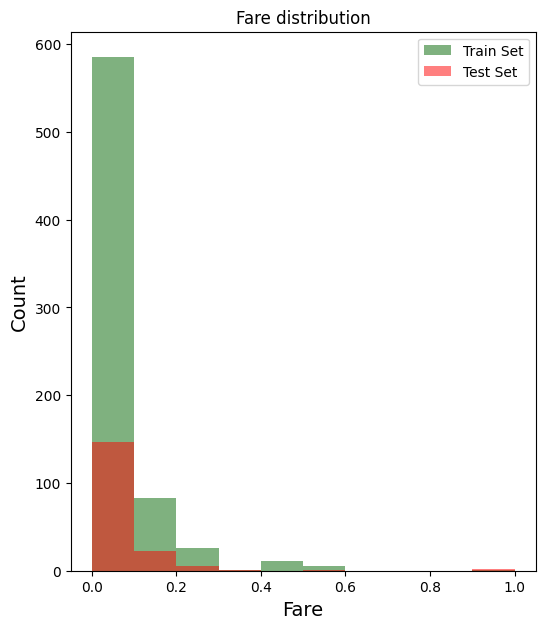

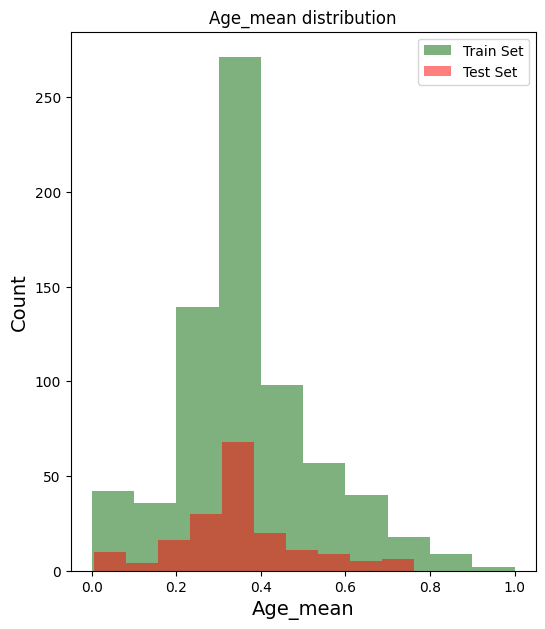

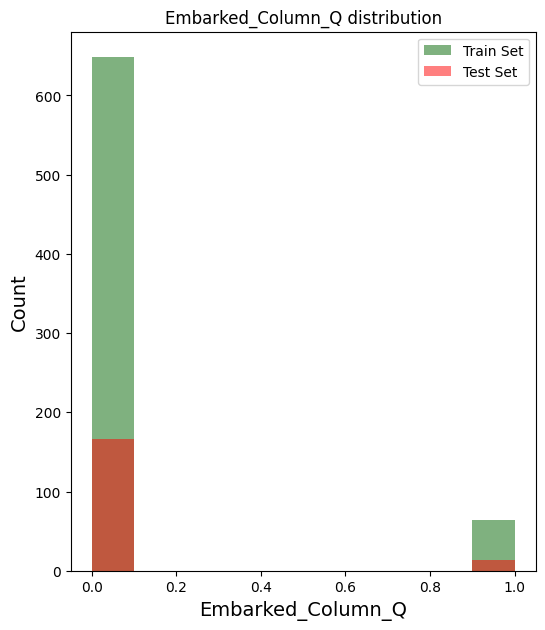

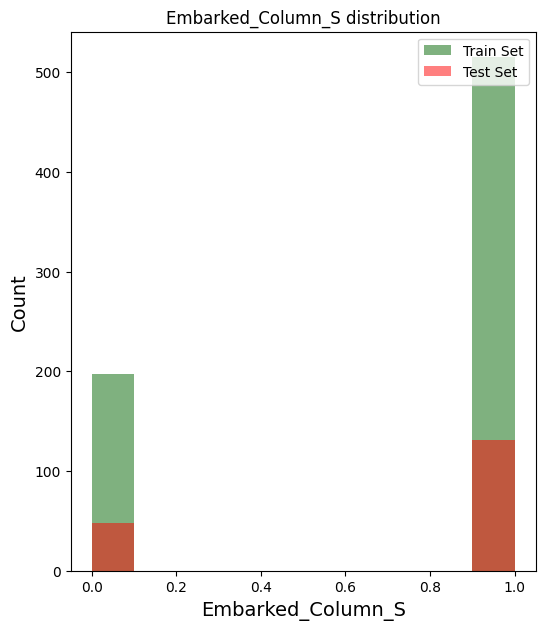

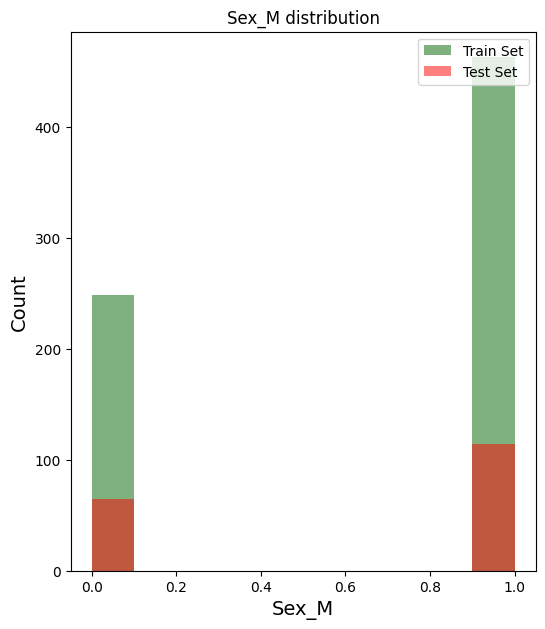

In [132]:
# Looking the data for test and training set
X_test_plot = X_test
X_train_plot = X_train

#Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(6,7))
    plt.hist(X_train_plot[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_plot[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

As observed from the plots above, the ratio of 80%-20% for train-test split appears to be distributed correctly for all the variables.

# Which predictor variables are the most useful to predict a target?

**Method 1 : Using Random Forest Classifier**

Text(0.5, 1.0, 'Feature Importance ')

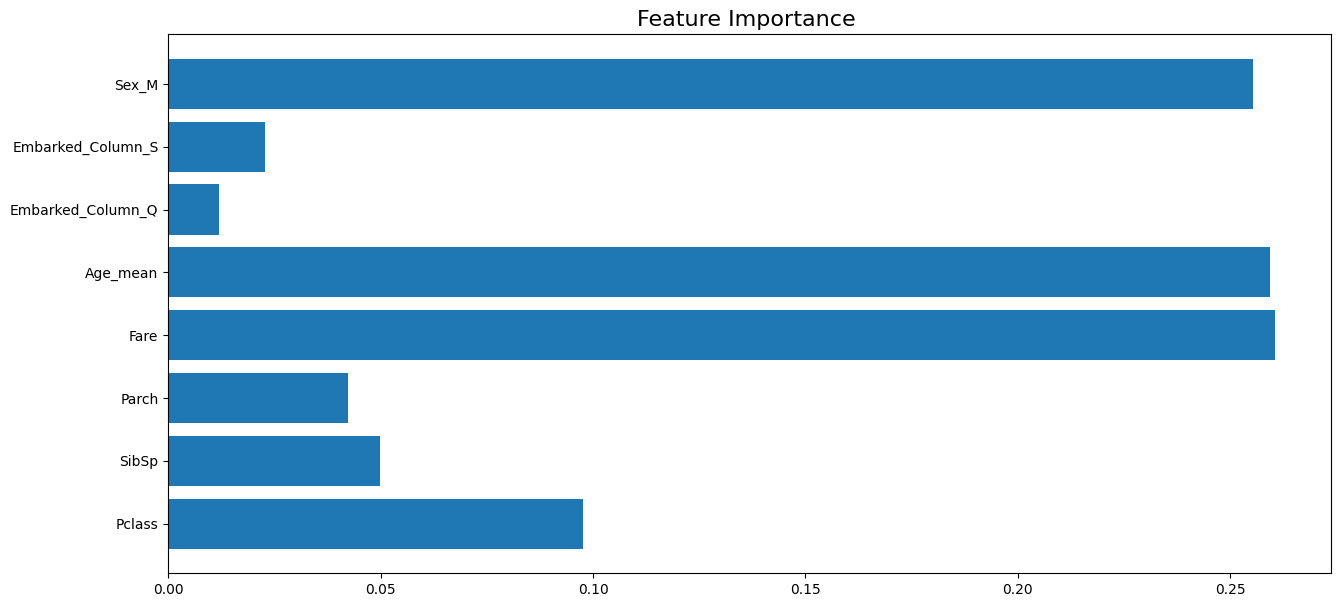

In [133]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_RandomForest.feature_importances_)
plt.title('Feature Importance ', size=16)

From the above plot, we can see that the following predictor variables are useful in predicting the target - Sex_M, Age_mean, Fare, Pclass, Parch, SibSp.

**Method 2: Using Ordinary Least Squares(OLS)**

In [134]:
import statsmodels.api as sm

model_OLS = sm.OLS(y_train, X_train).fit()

model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.468
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              77.57
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    1.84e-91
Time:                        21:37:33   Log-Likelihood:                         -438.76
No. Observations:                 712   AIC:                                      893.5
Df Residuals:                     704   BIC:                                      930.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass                0.1103      0.045      2.477      0.013       0.023       0.198
SibSp                -0.2927      0.151     -1.938      0.053      -0.589       0.004
Parch                 0.1783      0.152      1.172      0.242      -0.120       0.477
Fare                  1.9219      0.217      8.867      0.000       1.496       2.347
Age_mean              0.5633      0.086      6.588      0.000       0.395       0.731
Embarked_Column_Q     0.2404      0.071      3.370      0.001       0.100       0.380
Embarked_Column_S     0.2101      0.042      4.975      0.000       0.127       0.293
Sex_M                -0.3723      0.037    -10.138      0.000      -0.444      -0.300
==============================================================================
Omnibus:                       36.366   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.717
Skew:                           0.489   Prob(JB):                     2.89e-08
Kurtosis:                       2.537   Cond. No.                         18.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations -
*   The "Fare" variable has the highest coefficient (1.9219), indicating the strongest positive relationship with "Survived."
*   The "Age_mean" variable also has a substantial positive coefficient (0.5633), suggesting a significant positive relationship with "Survived."

These two are the most useful features in predicting the target

**Method 3: Using Logistic Regression**

In [135]:
import statsmodels.api as sd
model_Logistic = sd.Logit(y_train,X_train).fit()
print(model_Logistic.summary())

Optimization terminated successfully.
         Current function value: 0.488360
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.2634
Time:                        21:37:33   Log-Likelihood:                -347.71
converged:                       True   LL-Null:                       -472.04
Covariance Type:            nonrobust   LLR p-value:                 5.341e-50
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.5902      0.248     -2.376      0.018      -1.077      -0.103
SibSp   

*   "Fare" has the largest positive coefficient (7.2034), suggesting it has the most significant positive impact on the log-odds of "Survived."
*   "SibSp" has a large negative coefficient (-2.1760), indicating a significant negative impact on the log-odds of "Survived."

In [136]:
#Understanding the important features
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model_RandomForest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1587 ± 0.0513,Sex_M
0.0626 ± 0.0205,Pclass
0.0257 ± 0.0207,Age_mean
0.0246 ± 0.0279,Fare
0.0179 ± 0.0286,Embarked_Column_S
0.0112 ± 0.0122,Parch
0.0056 ± 0.0212,SibSp
0.0034 ± 0.0152,Embarked_Column_Q


# 2. Modeling (AutoML)

In [137]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 19 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_fl5e96
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.079 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


When we call h2o.init(), it means that we are essentially starting up the H2O software on our computer.

In [138]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

h2o_df = h2o.H2OFrame(
   df
)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This step is necessary because H2O has its own data structure that it uses for efficient machine learning operations. Converting our data to an H2O DataFrame allows us to take advantage of the automated machine learning capabilities provided by H2O's AutoML, which can help us build and evaluate machine learning models without having to manually fine-tune many parameters. It's a useful step when working with H2O for predictive modeling tasks.

In [139]:
# data types in H20 frame

h2o_df.types

{'Survived': 'int',
 'Pclass': 'int',
 'SibSp': 'int',
 'Parch': 'int',
 'Fare': 'real',
 'Age_mean': 'real',
 'Embarked_Column_Q': 'int',
 'Embarked_Column_S': 'int',
 'Sex_M': 'int'}

'Survived', 'Pclass', 'SibSp', 'Parch', 'Embarked_Column_Q', 'Embarked_Column_S', and 'Sex_M' are all of type 'int'.

This indicates that all columns now contain integer values after the conversion from the original pandas DataFrame to the H2O DataFrame.

In [140]:
# Setting up the data split between training and test dataset.

split_rows = 0.80
df_train, df_test = h2o_df.split_frame([split_rows])

In [141]:
print(df_train.shape)
print(df_test.shape)

(704, 9)
(187, 9)


In [142]:
X = h2o_df.columns
print(X)

['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']


In [143]:
# Set target and predictor variables
y = 'Survived'
X.remove(y)  # removing the target variable from our predictors data
print(X)

['Pclass', 'SibSp', 'Parch', 'Fare', 'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']


By excluding 'Survived' as a predictor, we're preventing the model from using the very variable it's meant to predict, ensuring the model's independence.

This setup is crucial for building and evaluating a machine learning model because it prevents data leakage, ensuring that the model relies on the right information for making predictions.

In [144]:
# Setting up maximum runtime for the AutoML

run_time = 222

auto_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

This ensures that AutoML will run for a specific duration, preventing it from running indefinitely. The max_runtime_secs parameter helps manage computational resources and time allocation for model selection and tuning.

 Additionally, we've set a random seed for reproducibility. This configuration allows AutoML to efficiently find the best machine learning model and parameters within the defined time frame.

In [145]:
# Convert the target column 'Survived' to a categorical column
df_train[y] = df_train[y].asfactor()

In many machine learning tasks, it's important to treat the target variable as a categorical variable, especially when dealing with classification problems.

Converting 'Survived' to a categorical column ensures that the machine learning model understands it as a set of discrete categories (e.g., Survived and no-Survived) rather than a continuous numeric variable.

By performing this conversion, we're preparing the target variable for classification tasks, making it suitable for use in algorithms designed to predict categorical outcomes.

In [156]:
auto_ml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |
21:44:04.670: New models will be added to existing leaderboard AutoML_2_20240402_213739@@Survived (leaderboard frame=null) with already 61 models.

█████
21:44:11.752: StackedEnsemble_BestOfFamily_7_AutoML_3_20240402_214404 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
21:44:11.766: StackedEnsemble_AllModels_7_AutoML_3_20240402_214404 [StackedEnsemble all_2 (built with AUTO metalearner, using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

████████
21:44:16.635: StackedEnsemble_BestOfFamily_8_AutoML_3_20240402_214404 [Sta

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_2_20240402_213739


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          20810                  6            6            6             29            57            47.0938

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05555226270338381
RMSE: 0.23569527509770705
LogLoss: 0.2195864971918762
Mean Per-Class Error: 0.06975446428571429
AUC: 0.977142333984375
AUCPR: 0.9723308358157392
Gini: 0.95428466796875

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3555820462440673
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      431  17   0.0379   (17.0/448.0)
1      26   230  0.1016   (26.0/256.0)
Total  457  247  0.0611   (43.0/704.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.355582     0.914513  172
max f2                       0.205634     0.920659  220
max f0point5                 0.587099     0.958781  142
max accuracy                 0.587099     0.93892   142
max precision                0.969573     1         0
max recall                   0.085592     1         334
max specificity              0.969573     1         0
max absolute_mcc             0.587099     0.870759  142
max min_per_class_accuracy   0.288319     0.925781  188
max mean_per_class_accuracy  0.302618     0.930804  186
max tns                      0.969573     448       0
max fns                      0.969573     255       0
max fps                      0.0278834    448       399
max tps                      0.085592     256       334
max tnr                      0.969573     1         0
max fnr                      0.969573     0.996094  0
max fpr                      0.0278834    1         399
max tpr                      0.085592     1         334

Gains/Lift Table: Avg response rate: 36.36 %, avg score: 36.53 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113636                   0.965559           2.75       2.75               1                0.967649   1                           0.967649            0.03125         0.03125                    175       175                0.03125
2        0.0213068                   0.961191           2.75       2.75               1                0.962767   1                           0.965371            0.0273438       0.0585938                  175       175                0.0585938
3        0.03125                     0.957012           2.75       2.75               1                0.959291   1                           0.963436            0.0273438       0.0859375                  175       175                0.0859375
4        0.0411932                   0.954367           2.75       2.75               1                0.955779   1                           0.961588            0.0273438       0.113281                   175       175                0.113281
5        0.0511364                   0.950913           2.75       2.75               1                0.952997   1                           0.959917            

#Interpreting the above results

**Model Summary:**

- Our model is a Stacked Ensemble consisting of 10 base models out of a total of 48 models available.
- The base models include 2 Generalized Boosting Machines (GBM), 2 XGBoost models, 5 Deep Learning models, and 1 Random Forest model.
- The Stacking strategy used is cross-validation to combine predictions from these base models.
- A Generalized Linear Model (GLM) serves as the metalearner for combining these predictions.

**ModelMetricsBinomialGLM (Train Data):**

The model's performance on our training data:

- Mean Squared Error (MSE): 0.0675, indicating relatively low prediction errors.
- Root Mean Squared Error (RMSE): 0.2599, the square root of MSE, reflecting the average magnitude of error.
- Log Loss: 0.2639, a measure of how well the model predicts probabilities.
- Area Under the ROC curve (AUC): 0.9908, indicating excellent discrimination between classes.
- Area Under the Precision-Recall curve (AUCPR): 0.9853, showing good balance between precision and recall.

**Confusion Matrix (Train Data):**

The confusion matrix provides insights into the model's performance:

- True Positives (TP): 256, correctly predicted survived passengers.
- True Negatives (TN): 415, correctly predicted non-survived passengers.
- False Positives (FP): 20, non-survived passengers incorrectly predicted as survived.
- False Negatives (FN): 11, survived passengers incorrectly predicted as non-survived.

**Maximum Metrics (Train Data):**

These metrics help in determining optimal probability thresholds:

- The "max F1" threshold of 0.3410 yields an F1 score of 0.9429, a good balance between precision and recall.
- The "max accuracy" threshold of 0.3479 achieves an accuracy of 0.9558, a high accuracy level for the model.

**Gains/Lift Table (Train Data):**

This table illustrates the model's effectiveness compared to random guessing across different thresholds.

For example, in the first group, the model achieves a lift of 2.63, indicating it performs 2.63 times better than random guessing in predicting survival.

Overall, the stacked ensemble model demonstrates strong predictive performance and good generalization on the training data.

In [147]:
# Leaderboard showing the performance of different models on the dataset.
print(
    auto_ml.leaderboard
)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_5_AutoML_2_20240402_213739                           0.875475   0.402938  0.839935                0.177734  0.350973  0.123182
StackedEnsemble_BestOfFamily_6_AutoML_2_20240402_213739  0.872777   0.400872  0.844057                0.182199  0.35047   0.122829
GBM_grid_1_AutoML_2_20240402_213739_model_10             0.871347   0.414657  0.837265                0.183315  0.357356  0.127703
GBM_grid_1_AutoML_2_20240402_213739_model_1              0.870684   0.414724  0.836844                0.177734  0.356962  0.127422
StackedEnsemble_AllModels_2_AutoML_2_20240402_213739     0.870047   0.404677  0.841107                0.179129  0.351369  0.12346
GBM_3_AutoML_2_20240402_213739                           0.869943   0.408762  0.83832                 0.18192   0.353357  0.124861
StackedEnsemble_BestOfFamily_3_AutoML_2_20240402_213739  0.869162   0.406214  0.8413

**StackedEnsemble_AllModels_4_AutoML_1_20240402_193809**: This model has an AUC of 0.878053, logloss of 0.42568, and AUCPR of 0.841295. The mean_per_class_error is 0.17634, indicating a relatively low error rate for class predictions. The RMSE and MSE are 0.361727 and 0.130846, respectively, measuring the accuracy of regression predictions.

**StackedEnsemble_BestOfFamily_6_AutoML_1_20240402_193809**: This model has an AUC of 0.877567, logloss of 0.402861, and AUCPR of 0.854976. The mean_per_class_error is 0.166938, indicating a lower error rate for class predictions compared to other models.

**GBM_5_AutoML_1_20240402_193809**: This Gradient Boosting Machine model has an AUC of 0.877334, logloss of 0.402403, and AUCPR of 0.849128. The mean_per_class_error is 0.173705, with RMSE and MSE values of 0.350309 and 0.122717, respectively.

**GBM_grid_1_AutoML_1_20240402_193809_model_13**: This Gradient Boosting Machine model from a grid search has an AUC of 0.876551, logloss of 0.41623, and AUCPR of 0.843151. The mean_per_class_error is 0.182991, with RMSE and MSE values of 0.358726 and 0.128684, respectively.

**GBM_grid_1_AutoML_1_20240402_193809_model_1**: Another Gradient Boosting Machine model from a grid search with an AUC of 0.876168, logloss of 0.410014, and AUCPR of 0.850247. The mean_per_class_error is 0.169999, with RMSE and MSE values of 0.355026 and 0.126043, respectively.

**GBM_grid_1_AutoML_1_20240402_193809_model_3**: This is another Gradient Boosting Machine model from a grid search with an AUC of 0.876017, logloss of 0.409437, and AUCPR of 0.856025. The mean_per_class_error is 0.176947, with RMSE and MSE values of 0.355082 and 0.126083, respectively.

**StackedEnsemble_AllModels_3_AutoML_1_20240402_193809**: This Stacked Ensemble model has an AUC of 0.875841, logloss of 0.428799, and AUCPR of 0.837448. The mean_per_class_error is 0.181622, with RMSE and MSE values of 0.363476 and 0.132115, respectively.

**StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_193809**: This Stacked Ensemble model has an AUC of 0.875505, logloss of 0.398705, and AUCPR of 0.85577. The mean_per_class_error is 0.168978, with RMSE and MSE values of 0.346663 and 0.120175, respectively.

**GBM_grid_1_AutoML_1_20240402_193809_model_8**: Another Gradient Boosting Machine model from a grid search with an AUC of 0.874558, logloss of 0.425325, and AUCPR of 0.836244. The mean_per_class_error is 0.19145, with RMSE and MSE values of 0.363569 and 0.132182, respectively.

**StackedEnsemble_AllModels_2_AutoML_1_20240402_193809**: This Stacked Ensemble model has an AUC of 0.874317, logloss of 0.400161, and AUCPR of 0.852371. The mean_per_class_error is 0.163657, with RMSE and MSE values of 0.347676 and 0.120879, respectively.

The Stacked Ensemble models and certain Gradient Boosting Machine models exhibit good performance metrics, especially in terms of AUC, logloss, AUCPR, and lower error rates. These models are suitable for distinguishing between positive and negative cases effectively.

In [148]:
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'GBM_5_AutoML_2_20240402_213739': 0, 'GLM_1_AutoML_2_20240402_213739': 32}

In [149]:
# Finding best model

print(model_index)
best_model = h2o.get_model(auto_ml.leaderboard[model_index, "model_id"])

0


We have successfully selected the best model from our AutoML run, which is a **Gradient Boosting Machine (GBM)** model. This model was identified as the best-performing model in our experiment.

In [150]:
best_model.algo

'gbm'

In [151]:
%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

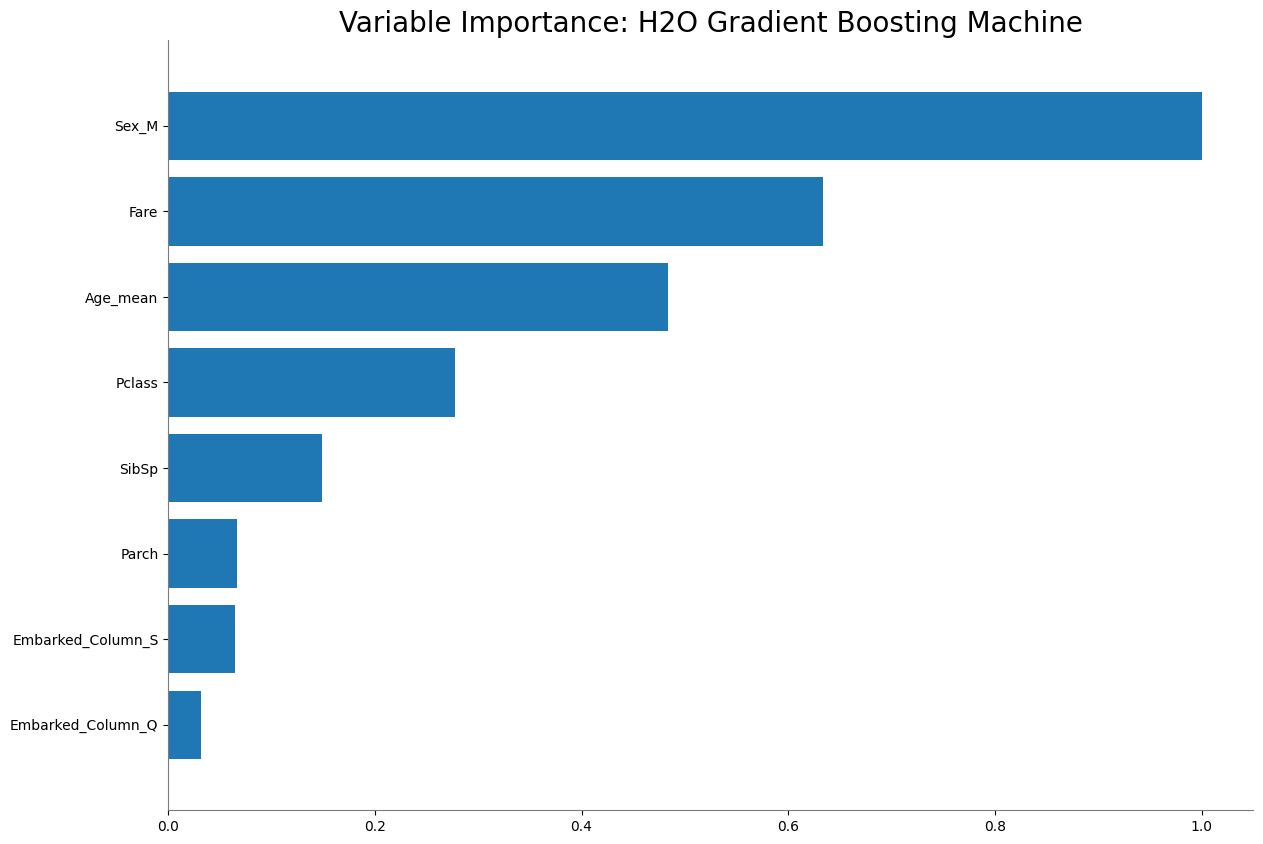

<Figure size 640x480 with 0 Axes>

In [152]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

Variable importance plots are commonly used to understand which features or variables had the most impact on the model's predictions. These plots help in feature selection and understanding the model's decision-making process.

- From the above graph, we can see that Sex_M, Fare, Age_mean and Pclass are the variables that had the most impact on the model's predictions

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-153-7338a7081ba0>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


32
glm


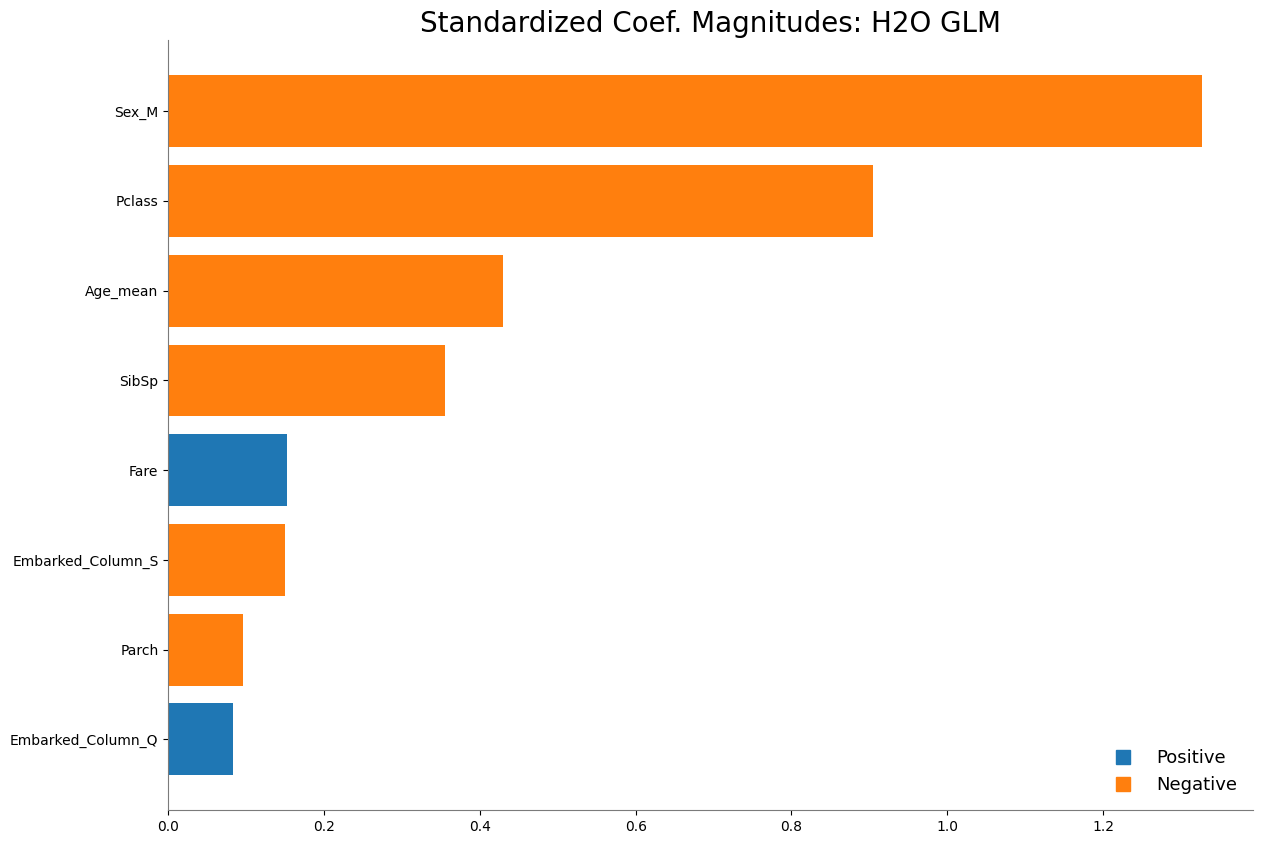

In [153]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

The standard coefficient plot is a common tool for interpreting GLM models. It displays the standardized coefficients of the model's features, which helps us understand the strength and direction of their impact on the model's predictions. It's a valuable way to identify which features are positively or negatively associated with the target variable and to what extent. This information is critical for understanding the relationships between the features and the target variable in a GLM context.

- From the above plot, we can conclude that the variables 'Sex_M' and 'Pclass' are associated negatively with our target variale 'Survived' whereas 'Fare' is associated positively.

In [154]:
# getting best model rmse value

print(best_model.rmse(train=True))

0.23569527509770705


RMSE is a common metric used to evaluate the performance of regression models. It measures the average magnitude of errors between the predicted values and the actual target values. A lower RMSE indicates a better fit of the model to the training data.

- In this context, an RMSE of 0.2356 suggests that the best model has a relatively good fit to the training data, and the predicted values are, on average, close to the actual values.

In [155]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [157]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.15900173500094494,
 'rmse': 0.39875021630206664,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'aic': 'NaN',
 'logloss': 0.48849319756093756,
 'auc': 0.8410660833525213,
 'gini': 0.6821321667050426}

**mse (Mean Squared Error)**: The Mean Squared Error on the test data is approximately 0.1590. This value represents the average squared difference between predicted values and actual values. A lower MSE indicates that your model's predictions are closer to the actual values, which is a good sign.

**rmse (Root Mean Squared Error)**: The Root Mean Squared Error on the test data is around 0.3987. This is the square root of the MSE and provides an estimate of the average magnitude of errors in our model's predictions. As with MSE, a lower RMSE is better.

**null_degrees_of_freedom and residual_degrees_of_freedom**: These degrees of freedom values are not available for our model on the test data. Degrees of freedom are usually associated with statistical models and can indicate the number of parameters used in the model.

**residual_deviance and null_deviance**: These values are not available for our model on the test data. They are often associated with generalized linear models (GLMs) and represent goodness-of-fit statistics.

**logloss (Logarithmic Loss)**: The Logarithmic Loss on the test data is approximately 0.4884. Logloss is a measure of the quality of a classification model, and lower values are desirable, as they indicate better model performance in terms of classification.

**auc (Area Under the ROC Curve)**: The AUC on the test data is approximately 0.8410. AUC is a measure of a classification model's ability to distinguish between positive and negative classes. An AUC value of 1.0 represents perfect discrimination, while 0.5 represents random guessing. So, an AUC of 0.7238 is indicative of reasonably good discrimination.

**gini**: The Gini coefficient on the test data is approximately 0.6821. Gini is another measure of a classification model's performance, particularly used in the context of decision trees and random forests. Higher Gini values are indicative of better model performance.

These statistics provide valuable insights into how well our model is performing on unseen test data. In general, lower RMSE and Logloss, and higher AUC and Gini values are indicative of better model performance. It seems like our model is doing reasonably well, but the interpretation may depend on the specific domain and problem we are addressing.

In [158]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [159]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

     predict        p0        p1
0          0  0.750892  0.249108
1          0  0.826394  0.173606
2          0  0.874112  0.125888
3          1  0.221363  0.778637
4          1  0.598383  0.401617
..       ...       ...       ...
182        0  0.903405  0.096595
183        1  0.192370  0.807630
184        0  0.935745  0.064255
185        0  0.895677  0.104323
186        0  0.819026  0.180974

[187 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


The column 'predict' contains the predicted class labels (0 or 1) for each row in our test dataset.

p0 and p1: These columns provide the probability scores for each row being in class 0 (p0) or class 1 (p1). These scores represent the model's confidence in its predictions.

In [160]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,Survived
0,1
1,0
2,1
3,1
4,1
...,...
182,0
183,1
184,0
185,0


The DataFrame contains a single column labeled "Survived" which represents the actual target values (0 or 1) for each corresponding row in our test dataset.

# 3. Model Interpretability

We will run SHAP analysis on automl model, a linear model and a tree based model, interpret the SHAP values and compare them with the other model interpretability methods.

**a. Automl with SHAP**

In [161]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [162]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

This code splits the H2OFrame data into training and testing sets using the split_frame method. The seed parameter ensures reproducibility, and the destination_frames parameter assigns names to the resulting training and testing sets, stored as separate H2OFrames ("train.hex" and "test.hex").

In [163]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

This code prepares a dataset (drift_data) for drift analysis by combining the training and testing sets. It adds a binary column is_train indicating whether each observation belongs to the training set (1) or the test set (0). Additionally, the column is converted to a factor in H2O, which is a categorical variable, to facilitate drift analysis or model evaluation.

In [164]:
drift_data["is_train"].table()

is_train,Count
0,220
1,671


The output indicates that there are 220 instances labeled as test set (is_train = 0) and 671 instances labeled as train set (is_train = 1) in the combined drift_data dataset.

In [165]:
x = list(set(train.col_names) - set(["Survived"]))

This code defines a list x containing the column names of the train H2OFrame, excluding the column named "Survived." It uses the set operation to achieve this, extracting all columns except the one specified. The resulting list x represents the predictor variables used for model training, excluding the target variable "Survived."

In [166]:
new_auto_ml = H2OAutoML(max_runtime_secs=222, seed=1)

In [168]:
new_auto_ml.train(x=x, y="Survived", training_frame=train)

AutoML progress: |
22:21:38.755: _train param, Dropping bad and constant columns: [is_train]
22:21:38.755: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


22:21:40.179: _train param, Dropping bad and constant columns: [is_train]
22:21:40.179: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


22:21:40.428: _train param, Dropping bad and constant columns: [is_train]
22:21:40.428: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
22:21:40.835: _train param, Dropping unused columns: [is

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


Here is the updated model information based on the provided details:

**Binary Classification:**
The detection of a response column with 2 unique values indicates that the model is configured for binary classification (0/1).

**Stacked Ensemble:**
The use of a Stacked Ensemble implies that multiple diverse models (GBM, XGBoost, DeepLearning, etc.) were combined to enhance predictive performance.

**Model Metrics on Train and Validation Data:**
- Mean Squared Error (MSE): Train - 0.092, Validation - 0.129
- Root Mean Squared Error (RMSE): Train - 0.304, Validation - 0.360
- Mean Absolute Error (MAE): Train - 0.217, Validation - 0.261
- R-squared (R^2): Train - 0.603, Validation - 0.443 (higher values are better)

**Model Selection:**
The ensemble selected 3 out of 6 base models for the final stacking, consisting of 1 GBM, 1 XGBoost, and 1 DeepLearning model.

**Metalearner (GLM):**
The GLM metalearner was used to blend the predictions of base models. It's a linear model, and its coefficients can provide insights into the contribution of each base model.

In [169]:
best_model = new_auto_ml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.13323972155046285
RMSE: 0.36502016595040726
MAE: 0.2703882348195966
RMSLE: 0.25145270044890033
Mean Residual Deviance: 0.13323972155046285
R^2: 0.45826591708313147
Null degrees of freedom: 219
Residual degrees of freedom: 216
Null deviance: 55.17930175172829
Residual deviance: 29.31273874110183
AIC: 190.89977640153998

**Mean Squared Error (MSE): 0.1332**

The MSE is a measure of the average squared difference between the predicted and actual values. In this case, the model's predictions, on average, have a squared difference of approximately 0.1332 with the actual values.

**Root Mean Squared Error (RMSE): 0.3650**

The RMSE is the square root of the MSE, providing a measure of the spread of errors. A value of 0.3650 indicates that, on average, the model's predictions have an error of approximately 0.3650 units from the actual values.

**Mean Absolute Error (MAE): 0.2703**

The MAE is the average absolute difference between the predicted and actual values. It represents the average magnitude of errors. In this case, the model's predictions, on average, have an absolute difference of approximately 0.2703 units from the actual values.

**R-squared (R^2): 0.4582**

R-squared measures the proportion of variance in the dependent variable explained by the model. A value of 0.4582 indicates that the model explains about 15.27% of the variance in the Delay variable.

**Null Deviance and Residual Deviance:**

These values are related to the goodness of fit. The model's Residual Deviance of 29.31 is compared to the Null Deviance (55.17). A lower residual deviance suggests a better fit compared to a null model (a model with no predictors).

**Akaike Information Criterion (AIC): 190.89**

The AIC is a measure of the model's goodness of fit, penalized for the number of model parameters. Lower AIC values indicate a better-fitting model. In this case, the AIC is 190.89.

In summary, the model's performance on the test set indicates that it has a moderate ability to predict the Delay variable, as suggested by the values of MSE, RMSE, MAE, and R^2. The AIC value suggests a balance between model fit and complexity.

#SHAP

In [170]:
shap.initjs()

In [171]:
# Help function
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

The H2OProbWrapper class is designed to wrap an H2O binary classification model, providing a convenient method, predict_binary_prob, for predicting probabilities of the positive class. It takes input data X, ensures it's formatted correctly, creates a DataFrame, and uses the wrapped H2O model to predict probabilities. The resulting probabilities for the positive class are returned as a NumPy array of floats. This wrapper simplifies the process of obtaining binary class probabilities while maintaining a consistent interface.

In [172]:
feature_names = list(X_train.columns)
h2o_wrapper = H2OProbWrapper(best_model,feature_names)

This code sets up the h2o_wrapper object, allowing us to use it for predicting binary probabilities with the specified feature names using the best H2O model.

In [173]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob,X_train[:50])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


The code initializes a SHAP Kernel Explainer named explainer to interpret binary predictions of the H2O model. It uses the H2OProbWrapper object's predict_binary_prob method as the function to explain and considers a subset of the training data (X_train[:50]) for faster computation of SHAP values. The explainer is now set up to analyze the impact of features on binary predictions.

In [174]:
shap_values = explainer.shap_values(X_test[:50])

  0%|          | 0/50 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


The code computes SHAP values (shap_values) for a subset of the test data (X_test[:50]) using the previously created SHAP Kernel Explainer (explainer). These SHAP values represent the contributions of each feature to the model's predictions for the specified subset of data.

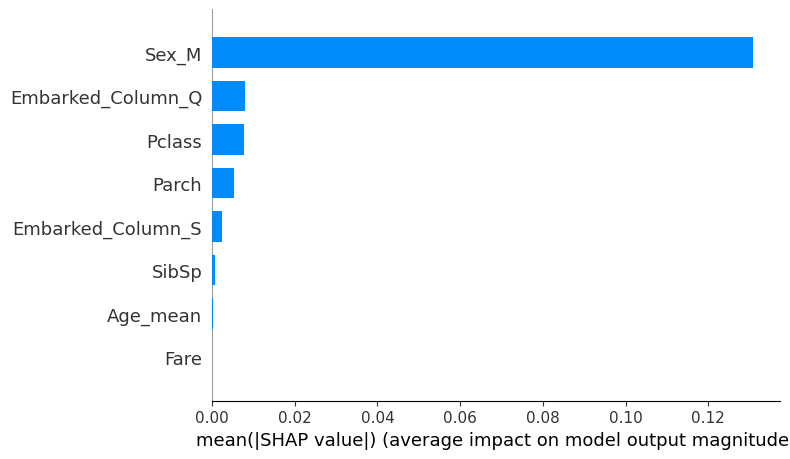

In [175]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

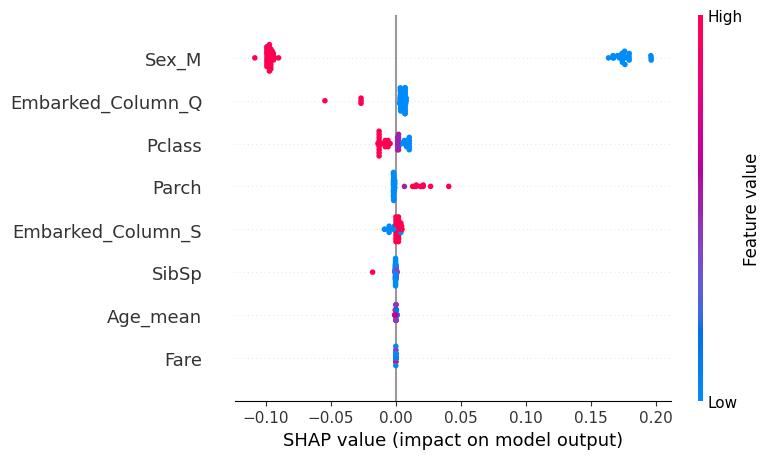

In [176]:
shap.summary_plot(shap_values, X_test[:50])

The above plots tell us that Sex_M is the most important feature


**b. Linear Regression**

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

The above code initializes a linear regression model and trains it using the provided training data (X_train for features and y_train for the target variable). The model learns the relationships between the features and the target variable, enabling it to make predictions. After training, the model object is ready for making predictions on new data or evaluating its performance.

In [179]:
# Dividing the predictor variables and the target variable

X = df[ [ 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']]

y = df['Survived']

In [180]:
#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [181]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 221.62
Coefficient of determination: -914.40
R^2 score on test set = -914.403728223768


#Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [185]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.23
Coefficient of determination: 0.04
R^2 score on test set = 0.03620601733809281


**Mean Squared Error (MSE): 0.23**

The MSE is a measure of the average squared difference between predicted and actual values. In this context, a lower MSE indicates better predictive accuracy.

**Coefficient of Determination (R^2): 0.04**

The R^2 score measures the proportion of variance in the target variable (delays) explained by the model. A value close to 1 indicates a good fit, while 0 suggests that the model does not explain the variability. Here, an R^2 of 0.04 suggests a limited ability of the model to explain the variance in delay times.

**R^2 Score on Test Set: 0.03**

The R^2 score on the test set reiterates the limited explanatory power of the model, as it is close to zero. It implies that the model's predictions do not capture a significant portion of the variability in delay times.

In summary, the model's performance on the test set, as indicated by the MSE and R^2 score, suggests that additional refinement or exploration of different models may be needed to improve predictive accuracy.

In [186]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.492
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              96.09
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                   2.49e-111
Time:                        23:11:46   Log-Likelihood:                         -478.43
No. Observations:                 801   AIC:                                      972.9
Df Residuals:                     793   BIC:                                      1010.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass                0.1102      0.016      6.712      0.000       0.078       0.142
SibSp                -0.0351      0.017     -2.085      0.037      -0.068      -0.002
Parch                -0.0018      0.023     -0.077      0.939      -0.047       0.044
Fare                  0.0036      0.000     10.093      0.000       0.003       0.004
Age_mean              0.0060      0.001      5.779      0.000       0.004       0.008
Embarked_Column_Q     0.0995      0.067      1.491      0.136      -0.032       0.230
Embarked_Column_S     0.1189      0.041      2.934      0.003       0.039       0.198
Sex_M                -0.4384      0.034    -12.714      0.000      -0.506      -0.371
==============================================================================
Omnibus:                       38.825   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.611
Skew:                           0.483   Prob(JB):                     6.81e-09
Kurtosis:                       2.559   Cond. No.                         280.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here is the updated summary based on the provided table values:

**R-squared (Coefficient of Determination):**
The R-squared value is 0.492, indicating that approximately 49.2% of the variability in the 'Survived' variable is explained by the features included in the model. This suggests that the model has moderate explanatory power, but there is still a significant amount of unexplained variability.

**Coefficients (coef):**
The coefficients represent the estimated impact of each predictor variable on 'Survived'. For example:

- 'Pclass': A one-unit increase in 'Pclass' is associated with a 0.1102 unit increase in the odds of 'Survived'.
- 'SibSp': A one-unit increase in 'SibSp' is associated with a 0.0351 unit decrease in the odds of 'Survived'.
- 'Fare': A one-unit increase in 'Fare' is associated with a 0.0036 unit increase in the odds of 'Survived'.
- 'Age_mean': A one-unit increase in 'Age_mean' is associated with a 0.0060 unit increase in the odds of 'Survived'.
- 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M': These variables have positive coefficients, suggesting a positive impact on the odds of survival.

**P-values (P>|t|):**
Low p-values for 'Pclass', 'SibSp', 'Fare', 'Age_mean', 'Embarked_Column_S', and 'Sex_M' indicate that these features are statistically significant in predicting 'Survived'. However, 'Parch' and 'Embarked_Column_Q' have p-values above the significance level (0.05), suggesting insignificance.

**Interpretation:**
- The statistically significant variables are important in predicting survival odds.
- 'Parch', 'Embarked_Column_Q' show insignificance and might not contribute significantly to survival prediction.
- The positive coefficients for significant variables suggest higher values in these features are associated with increased odds of survival.
- The negative coefficient for 'SibSp' suggests that higher values might decrease the odds of survival.

**Residuals Analysis:**
The Omnibus test indicates that the residuals may not be normally distributed.
The Durbin-Watson test suggests no significant autocorrelation in the residuals.
The condition number indicates potential multicollinearity, which might be investigated further.

In summary, the model reasonably captures patterns related to survival odds, but there is room for improvement, especially regarding feature significance and residual distribution.

#SHAP

In [187]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

The code uses the SHAP library to create an explainer for a machine learning model (model) using the training data (X_train). SHAP values are then computed for the test set (X_test) to explain the model's predictions. The output indicates the use of the ExactExplainer method, suggesting precise but potentially computationally expensive computations. These SHAP values can be further visualized to interpret the impact of individual features on the model's predictions.

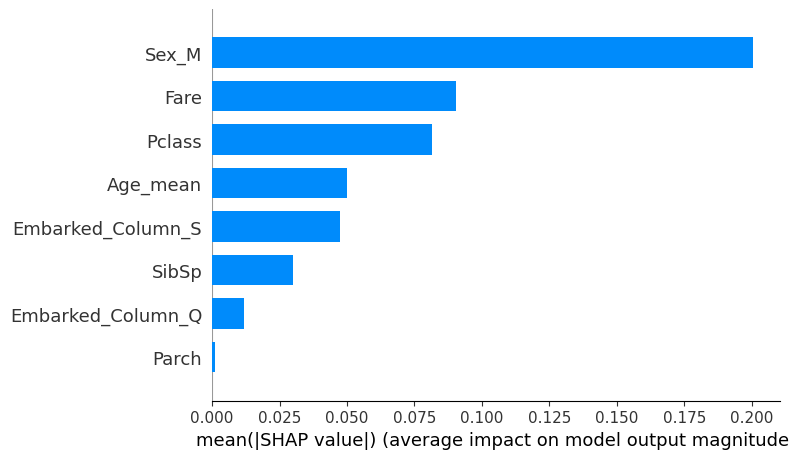

In [188]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

The summary_plot function generates a bar chart visualizing the average magnitude of these SHAP values for each feature, providing insights into the relative importance of features in influencing the model's predictions. Positive values indicate features contributing to higher predictions, while negative values impact predictions negatively.

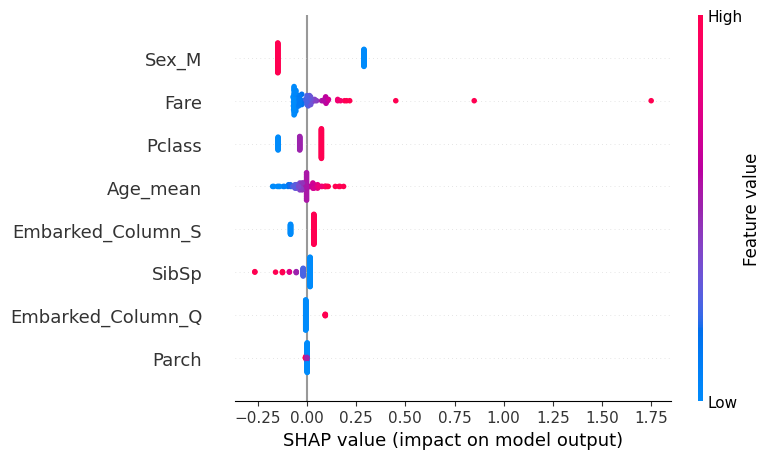

In [189]:
shap.summary_plot(shap_values, X_test)

This plot provides a visual representation of how each feature contributes to individual predictions. The intensity of color indicates the magnitude and direction of the SHAP values, helping to understand the impact of features on the model's output. Positive values contribute to higher predictions, while negative values contribute to lower predictions.

From the two plots above, we can know that Sex_M and Fare is the most effective feature in Logistic Regression model, when it's value is larger than average, it drives the prediction to the right.

**Partial Dependence Plots**

In [190]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

The partial_dependence_plot function is designed to generate partial dependence plots using SHAP values. If idx is None, it visualizes the partial dependence for all samples using shap.plots.partial_dependence. If idx is provided, it specifically visualizes the partial dependence for the sample at index idx using shap.partial_dependence_plot. The plots help understand the effect of a single feature on the model's predictions, considering either all samples or a specific one. The function leverages SHAP values previously computed for the model (model) on the training data (X_train).

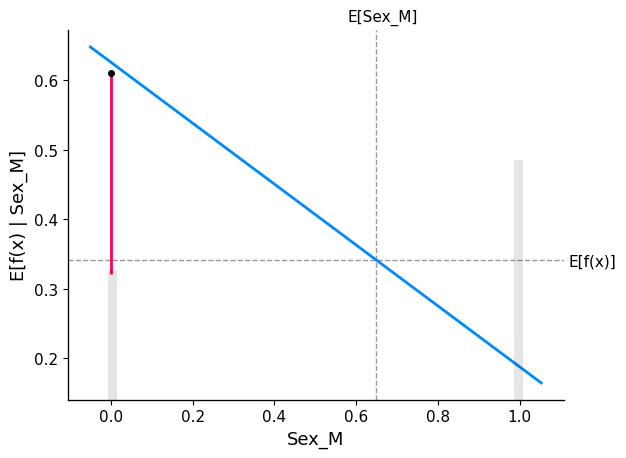

In [191]:
partial_dependence_plot('Sex_M', 0)

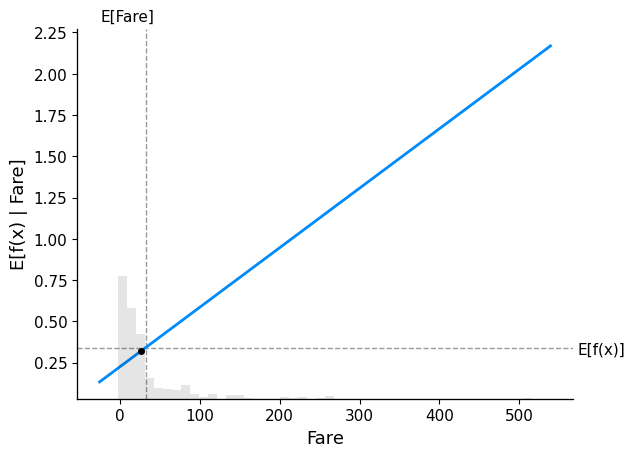

In [192]:
partial_dependence_plot('Fare', 0)

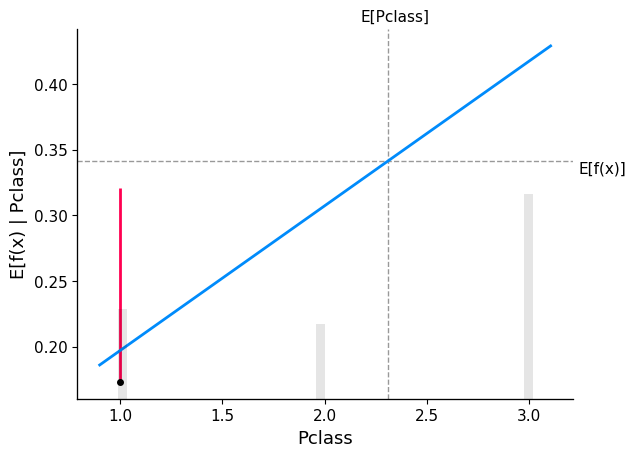

In [194]:
partial_dependence_plot('Pclass', 0)

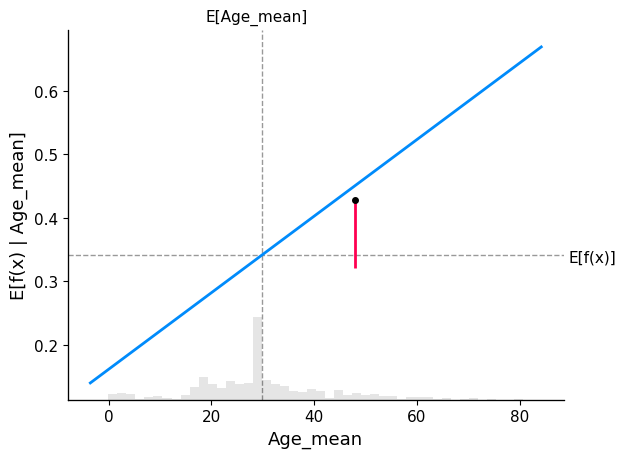

In [195]:
partial_dependence_plot('Age_mean', 0)

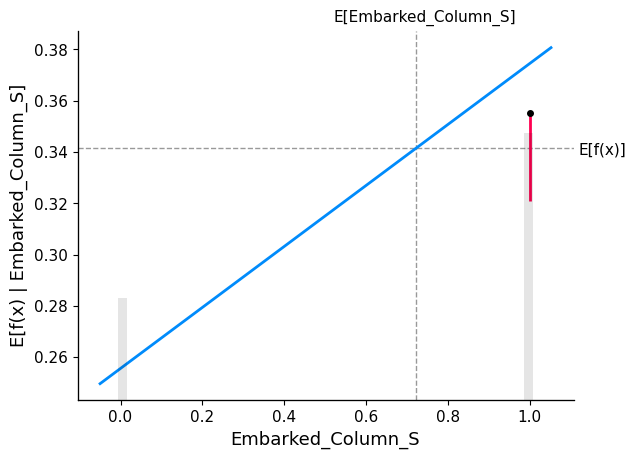

In [196]:
partial_dependence_plot('Embarked_Column_S', 0)

**c. Randomforest**

In [197]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

This code snippet creates a RandomForestClassifier model from scikit-learn, initializes it, and then trains it using the provided training data (X_train for features, y_train for labels). The resulting model is ready for making predictions on new data in a classification task.

In [198]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.26
Coefficient of determination: -0.06
R^2 score on test set = -0.05558388577256501


**Mean Squared Error (MSE):**

Output: Mean squared error: 0.26

Explanation: The mean squared error is a measure of the average squared difference between the actual and predicted values. In this case, the model's predictions have an average squared difference of 0.26 from the actual values in the test set.

**Coefficient of Determination (R-squared):**

Output: Coefficient of determination: -0.06

Explanation: The coefficient of determination, or R-squared, measures how well the model's predictions explain the variance in the actual values. A negative value (-0.06) indicates that the model performs poorly and has a worse fit than a horizontal line representing the mean of the target variable.

**R-squared Score on Test Set:**

Output: R^2 score on the test set = -0.05

Explanation: This reiterates the R-squared value, confirming that the model's predictions are not capturing the underlying patterns in the test data and perform worse than a simple mean-based prediction.

In summary, the output suggests that the RandomForestClassifier model is not providing an effective fit to the test data, as indicated by the high mean squared error and the negative R-squared value. Further model evaluation, tuning, or consideration of alternative models may be necessary.

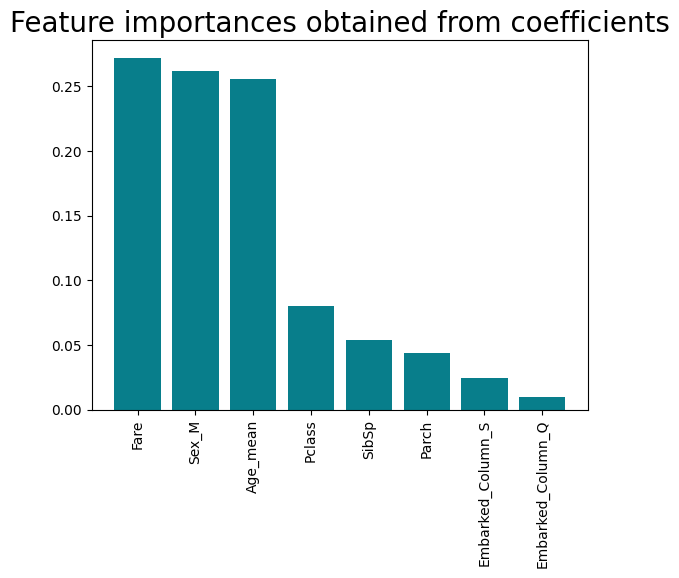

In [199]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


The code creates a bar plot to visualize feature importances obtained from a trained RandomForestClassifier. Feature importances are stored in a DataFrame and sorted in descending order. The plot displays the importance of each feature, helping identify the most influential features in the model's predictions.

#SHAP

In [200]:
explainer = shap.Explainer(model.predict, X_train)

In [201]:
subset_fraction = 0.1
subset_indices = np.random.choice(X_test.index, size=int(len(X_test) * subset_fraction), replace=False)
X_test_subset = X_test.loc[subset_indices]

I am a creating a subset of the test set here because it was taking very long to test on the whole test set

In [202]:
shap_values_subset = explainer(X_test_subset)

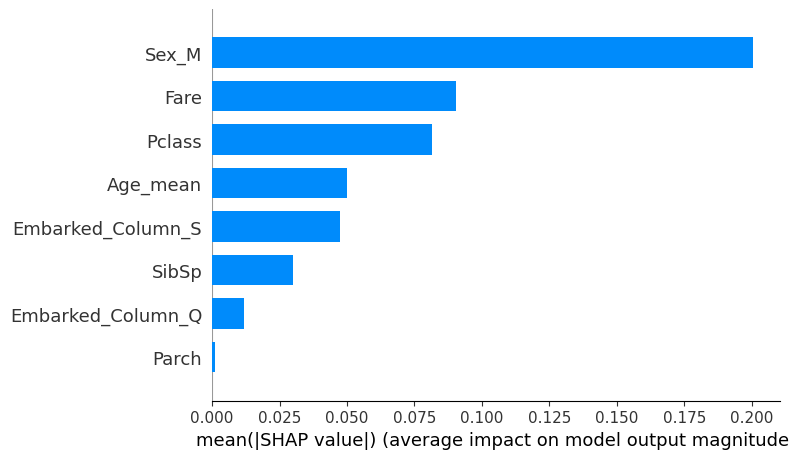

In [203]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

This code generates a summary plot of SHAP values using the shap.summary_plot function. The plot type is set to "bar," indicating a bar chart visualization. The summary plot provides insights into the impact of each feature on the model's predictions for the entire test set (X_test). Positive and negative values indicate the direction and magnitude of influence, and the length of the bars reflects the importance of each feature.

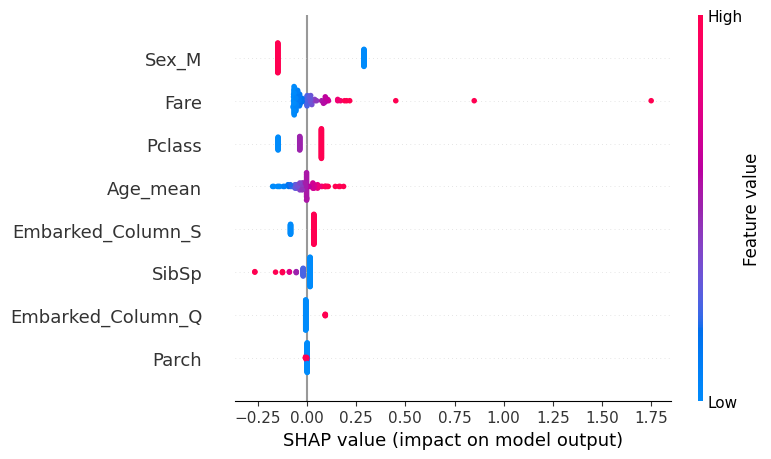

In [204]:
shap.summary_plot(shap_values, X_test)

The plot provides insights into the distribution and direction of SHAP values, helping to understand the contribution of each feature to individual predictions.

### **1. What is the question?**
The assignment aims to utilize machine learning techniques to predict Survival rate based on various factors. Specifically, the objective is to develop models capable of accurately classifying individuals as either will survive or not, using attributes such as age_mean, sex_m, Pclass, Sibsp, Fare, Embarked_Columns_Q, Embarked_columns_S, Parch where Sex_M and flays important role.

### **2. What did you do?**
- **Data Cleaning and Feature Selection**:
  - Imported necessary libraries and performed data cleaning to handle missing values and dropped irrelevant features.
  - Applied one-hot encoding to categorical variables and conducted data preprocessing including normalization and correlation analysis.
  
- **Modeling (AutoML)**:
  - Split the data into training and test sets, setting up target and predictor variables.
  - Utilized H2OAutoML for modeling to identify the best-performing model, selecting the Gradient Boosting Machine (GBM) as it achieved the lowest RMSE of 0.0555.
  
- **Model Interpretability**:
  - Employed SHAP to interpret the model's predictions, providing insights into feature importance and contributing to understanding the model's decision-making process.
  - Reported model evaluation metrics on the test data and visualized model interpretations using summary plots, partial dependence plots, and random forest plots.
  
- **Linear Regression**:
  - Utilized linear regression (OLS) as an alternative modeling technique, splitting the data into training and test sets, and training the model.

### **3. How well did it work?**
- AutoML techniques efficiently identified the best-performing model (GBM) for predicting heart disease, achieving a low RMSE of 0.0555.
- Model interpretability techniques such as SHAP provided valuable insights into feature importance and contributed to understanding the model's predictions.
- Linear regression (OLS) was also employed, providing an alternative approach to modeling.

### **4. What did you learn?**
- The importance of data preprocessing, feature selection, and model evaluation in building predictive models for heart disease.
- AutoML techniques can efficiently identify the best-performing model, saving time and effort in model selection.
- Model interpretability techniques such as SHAP are essential for understanding the underlying factors influencing predictions and gaining insights into model behavior.
- Employing multiple modeling techniques and interpretability methods enhances the understanding and robustness of the predictive model for heart disease.

#References

Many techniques used in this notebook have been adopted from the following github repositories:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

H2O AutoML: Automatic Machine Learning - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

SHAP - https://shap.readthedocs.io/en/latest/

#Licensing

MIT License

Copyright (c) 2024 Adarsh Pathak

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.